In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:

!pip install lightgbm
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [18]:
df = pd.read_csv(r"C:\Users\SASWAT\Desktop\Project\Complete-data.csv")
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,...,Earthquake_freq,Elevation_freq,Flow_freq,Lithology_freq,NDVI_freq,NDWI_freq,Plan_freq,Precipitation_freq,Profile_freq,Slope_freq
0,3,3,2,2,2,1,4,2,2,3,...,0.541254,0.254125,0.443069,0.624587,0.297030,0.293729,0.212871,0.144389,0.351485,0.245050
1,1,5,2,3,1,1,4,2,5,5,...,0.541254,0.216172,0.219472,0.624587,0.297030,0.293729,0.084983,0.444719,0.175743,0.245050
2,3,4,3,2,2,4,3,2,4,5,...,0.280528,0.254125,0.443069,0.089109,0.248350,0.293729,0.257426,0.444719,0.175743,0.245050
3,1,3,3,3,5,1,2,4,3,5,...,0.280528,0.216172,0.066832,0.624587,0.193069,0.181518,0.367162,0.444719,0.351485,0.272277
4,5,4,2,1,4,1,2,4,3,3,...,0.541254,0.299505,0.086634,0.624587,0.193069,0.181518,0.367162,0.144389,0.050330,0.238449
5,5,5,2,2,3,1,2,4,5,3,...,0.541254,0.254125,0.183993,0.624587,0.193069,0.181518,0.084983,0.144389,0.175743,0.245050
6,1,3,2,2,4,1,3,4,3,5,...,0.541254,0.254125,0.086634,0.624587,0.248350,0.181518,0.367162,0.444719,0.351485,0.245050
7,3,5,3,4,2,2,3,3,5,5,...,0.280528,0.170792,0.443069,0.066832,0.248350,0.208746,0.084983,0.444719,0.175743,0.238449
8,3,2,3,3,2,6,4,2,2,5,...,0.280528,0.216172,0.443069,0.042079,0.297030,0.293729,0.212871,0.444719,0.306106,0.238449
9,1,4,3,2,4,1,2,4,4,5,...,0.280528,0.254125,0.086634,0.624587,0.193069,0.181518,0.257426,0.444719,0.175743,0.238449


# EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [20]:
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df=df[new_cols]

In [21]:
df.describe().round(2)

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
count,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.0
mean,2.96,2.98,2.10,2.44,2.34,1.95,3.04,2.77,3.06,3.81,3.26,2.81,0.5
std,1.15,1.10,0.67,1.24,1.11,1.42,1.24,1.30,1.06,1.35,1.04,1.19,0.5
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0
25%,2.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,2.00,3.00,3.00,2.00,0.0
50%,3.00,3.00,2.00,2.00,2.00,1.00,3.00,3.00,3.00,4.00,3.00,3.00,0.5
75%,4.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,1.0
max,5.00,5.00,3.00,5.00,5.00,6.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0


In [22]:
for column in df.columns[0:]:
    print(column, ': ', len(df[column].unique()), ' labels')

Aspect :  5  labels
Curvature :  5  labels
Earthquake :  3  labels
Elevation :  5  labels
Flow :  5  labels
Lithology :  6  labels
NDVI :  5  labels
NDWI :  5  labels
Plan :  5  labels
Precipitation :  5  labels
Profile :  5  labels
Slope :  5  labels
Landslide :  2  labels


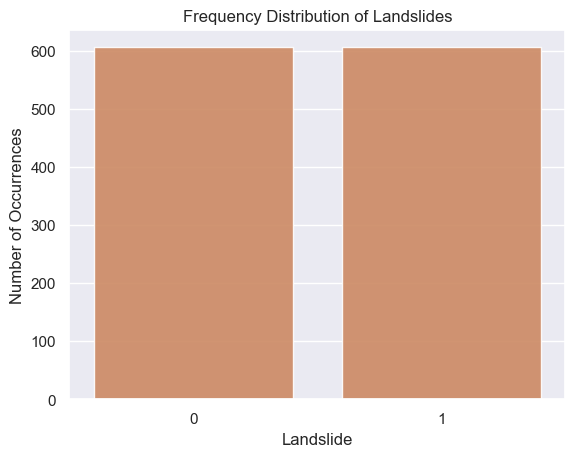

<Figure size 640x480 with 0 Axes>

In [25]:
landslide_count = df['Landslide'].value_counts()
sns.set(style="darkgrid")
sns.barplot(landslide_count.index, alpha=0.9)
sns.barplot(landslide_count.values, alpha=0.9) 
plt.title('Frequency Distribution of Landslides')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Landslide', fontsize=12)
plt.show()

plt.savefig('bar1.eps', format='eps')

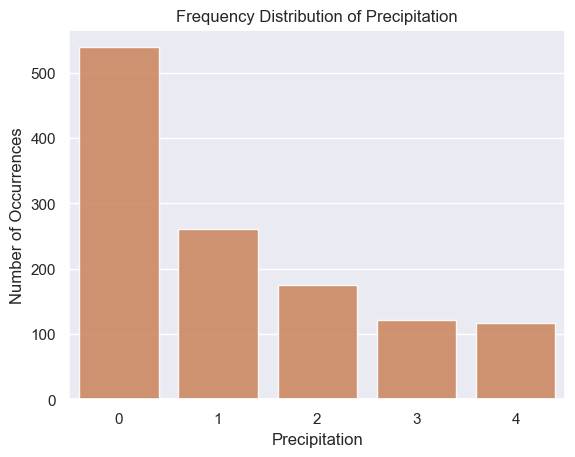

<Figure size 640x480 with 0 Axes>

In [30]:
perc_count = df['Precipitation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(perc_count.index, alpha=0.9)
sns.barplot(perc_count.values, alpha=0.9)
plt.title('Frequency Distribution of Precipitation')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Precipitation', fontsize=12)
plt.show()

plt.savefig('bar2.eps', format='eps')

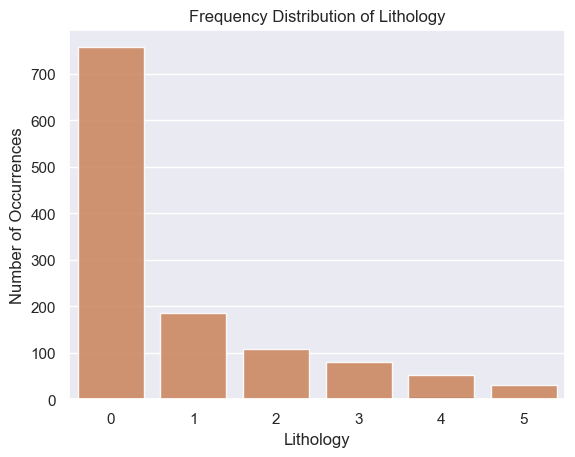

<Figure size 640x480 with 0 Axes>

In [31]:
lith_count = df['Lithology'].value_counts()
sns.set(style="darkgrid")
sns.barplot(lith_count.index, alpha=0.9)
sns.barplot(lith_count.values, alpha=0.9)
plt.title('Frequency Distribution of Lithology')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Lithology', fontsize=12)
plt.show()

plt.savefig('bar3.eps', format='eps')

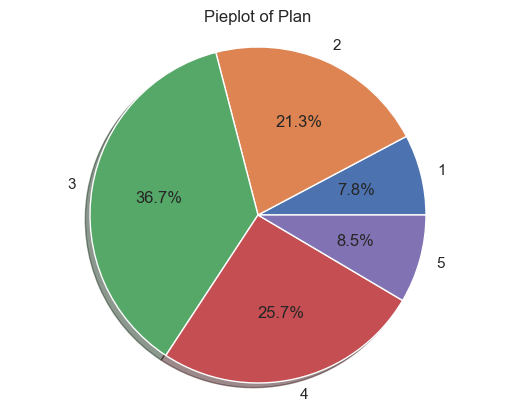

<Figure size 640x480 with 0 Axes>

In [32]:
labels = df['Plan'].astype('category').cat.categories.tolist()
counts = df['Plan'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Plan')
plt.show()

plt.savefig('pie1.eps', format='eps')

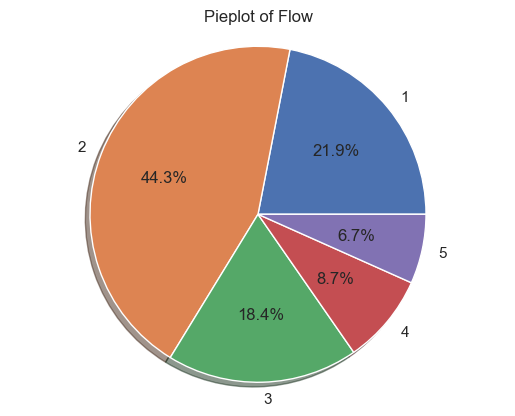

<Figure size 640x480 with 0 Axes>

In [33]:
labels = df['Flow'].astype('category').cat.categories.tolist()
counts = df['Flow'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Flow')
plt.show()

plt.savefig('pie2.eps', format='eps')

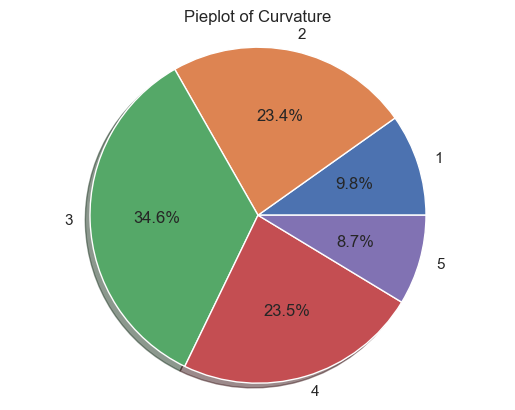

<Figure size 640x480 with 0 Axes>

In [34]:
labels = df['Curvature'].astype('category').cat.categories.tolist()
counts = df['Curvature'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Curvature')
plt.show()

plt.savefig('pie3.eps', format='eps')

c:\Users\SASWAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\SASWAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


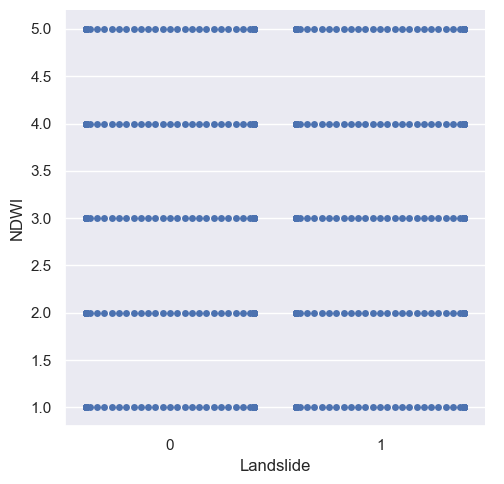

In [35]:
sns.catplot(x="Landslide", y="NDWI", kind="swarm", data=df)

plt.savefig('box1.eps', format='eps')

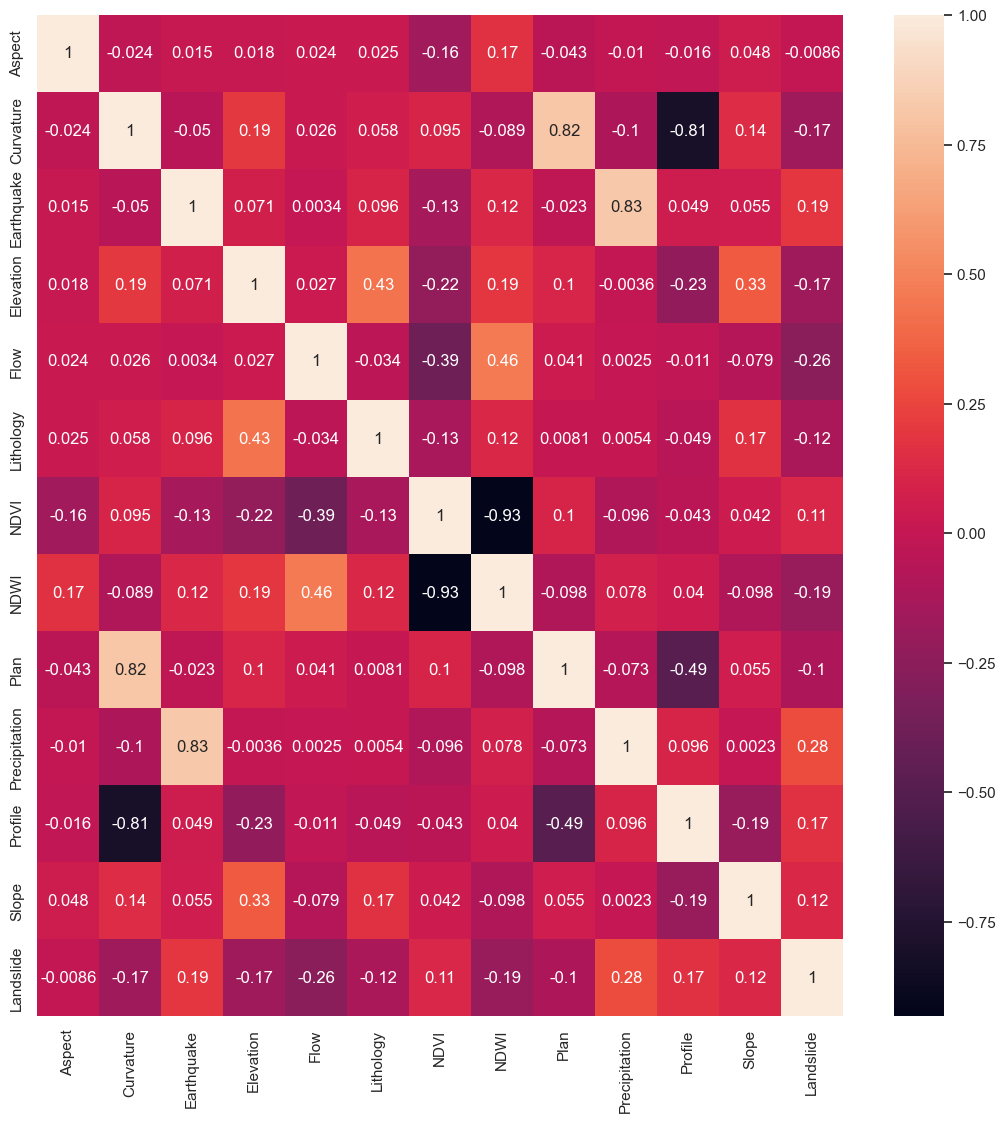

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True)

plt.show()

plt.savefig('corr1.eps', format='eps')

In [41]:
df.mean()

Aspect           2.962046
Curvature        2.977723
Earthquake       2.102310
Elevation        2.436469
Flow             2.338284
Lithology        1.948845
NDVI             3.042904
NDWI             2.773927
Plan             3.059406
Precipitation    3.813531
Profile          3.262376
Slope            2.811881
Landslide        0.500000
dtype: float64

In [42]:
df.groupby(['Landslide']).mean()

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
Landslide,,,,,,,,,,,,
0,2.971947,3.168317,1.976898,2.645215,2.628713,2.120462,2.904290,3.026403,3.168317,3.435644,3.085809,2.665017
1,2.952145,2.787129,2.227723,2.227723,2.047855,1.777228,3.181518,2.521452,2.950495,4.191419,3.438944,2.958746


In [43]:
df.corr()

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
Aspect,1.000000,-0.024232,0.014727,0.017998,0.024295,0.025086,-0.158561,0.168099,-0.043066,-0.010454,-0.015876,0.048420,-0.008633
Curvature,-0.024232,1.000000,-0.049595,0.193843,0.025736,0.058319,0.094625,-0.089028,0.815075,-0.104207,-0.806851,0.143316,-0.173393
Earthquake,0.014727,-0.049595,1.000000,0.071308,0.003382,0.095507,-0.134619,0.118588,-0.022582,0.825169,0.049177,0.055050,0.187313
Elevation,0.017998,0.193843,0.071308,1.000000,0.026903,0.429702,-0.217003,0.187921,0.104691,-0.003628,-0.228721,0.333029,-0.168049
Flow,0.024295,0.025736,0.003382,0.026903,1.000000,-0.033881,-0.393805,0.462291,0.041163,0.002451,-0.011119,-0.078842,-0.261124
Lithology,0.025086,0.058319,0.095507,0.429702,-0.033881,1.000000,-0.129279,0.119080,0.008051,0.005351,-0.048930,0.169103,-0.120538
NDVI,-0.158561,0.094625,-0.134619,-0.217003,-0.393805,-0.129279,1.000000,-0.931590,0.102043,-0.096063,-0.042720,0.041726,0.111900
NDWI,0.168099,-0.089028,0.118588,0.187921,0.462291,0.119080,-0.931590,1.000000,-0.097774,0.078201,0.040269,-0.098171,-0.194317
Plan,-0.043066,0.815075,-0.022582,0.104691,0.041163,0.008051,0.102043,-0.097774,1.000000,-0.072768,-0.487539,0.055292,-0.103052
Precipitation,-0.010454,-0.104207,0.825169,-0.003628,0.002451,0.005351,-0.096063,0.078201,-0.072768,1.000000,0.095657,0.002301,0.280490


## Important Features using Mutual Information Classification

In [44]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [45]:
train_ratio = 0.8
val_ratio = 0.2
train_df, val_df = train_test_split(df, train_size = train_ratio, random_state=42)

In [46]:
features = list(df.columns.values.tolist())
df_feat = df.iloc[:, :-1]
features_wo = list(df_feat.columns.values.tolist())

In [47]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Aspect         1212 non-null   int64
 1   Curvature      1212 non-null   int64
 2   Earthquake     1212 non-null   int64
 3   Elevation      1212 non-null   int64
 4   Flow           1212 non-null   int64
 5   Lithology      1212 non-null   int64
 6   NDVI           1212 non-null   int64
 7   NDWI           1212 non-null   int64
 8   Plan           1212 non-null   int64
 9   Precipitation  1212 non-null   int64
 10  Profile        1212 non-null   int64
 11  Slope          1212 non-null   int64
dtypes: int64(12)
memory usage: 113.8 KB


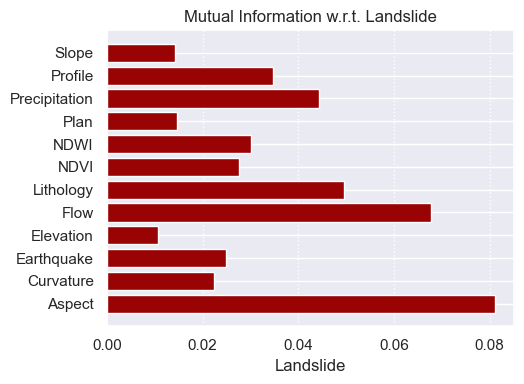

In [48]:
from sklearn.feature_selection import mutual_info_classif

MI = (mutual_info_classif(df[features_wo], df["Landslide"], n_neighbors=20,
                          random_state=42))
 
plt.figure(figsize=(5.4, 4))
plt.barh(y=features_wo, width=MI, color="#990303")
plt.title("Mutual Information w.r.t. Landslide");
plt.xlabel("Landslide")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout()

plt.savefig('mi.eps', format='eps')

In [49]:
best3 = ['Precipitation', 'Earthquake', 'Aspect']
best5 = ['Lithology', 'Flow']
best5.extend(best3)
best8 = ['Profile', 'NDWI', 'NDVI']
best8.extend(best5)
all_feat = features_wo

feat  = [best3, best5, best8, all_feat]

In [50]:
for i in feat:
    print(df[i].head(2))

   Precipitation  Earthquake  Aspect
0              3           2       3
1              5           2       1
   Lithology  Flow  Precipitation  Earthquake  Aspect
0          1     2              3           2       3
1          1     1              5           2       1
   Profile  NDWI  NDVI  Lithology  Flow  Precipitation  Earthquake  Aspect
0        3     2     4          1     2              3           2       3
1        2     2     4          1     1              5           2       1
   Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  NDVI  NDWI  \
0       3          3           2          2     2          1     4     2   
1       1          5           2          3     1          1     4     2   

   Plan  Precipitation  Profile  Slope  
0     2              3        3      2  
1     5              5        2      2  


# Feature Engineering

In [51]:
df.head(1)

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
0,3,3,2,2,2,1,4,2,2,3,3,2,0


## Frequency Encoding

In [52]:
Aspect_freq = df['Aspect'].value_counts(normalize=True)
df['Aspect_freq'] = df['Aspect'].apply(lambda x : Aspect_freq[x])

Curvature_freq = df['Curvature'].value_counts(normalize=True)
df['Curvature_freq'] = df['Curvature'].apply(lambda x : Curvature_freq[x])

Earthquake_freq = df['Earthquake'].value_counts(normalize=True)
df['Earthquake_freq'] = df['Earthquake'].apply(lambda x : Earthquake_freq[x])

Elevation_freq = df['Elevation'].value_counts(normalize=True)
df['Elevation_freq'] = df['Elevation'].apply(lambda x : Elevation_freq[x])

Flow_freq = df['Flow'].value_counts(normalize=True)
df['Flow_freq'] = df['Flow'].apply(lambda x : Flow_freq[x])

Lithology_freq = df['Lithology'].value_counts(normalize=True)
df['Lithology_freq'] = df['Lithology'].apply(lambda x : Lithology_freq[x])

NDVI_freq = df['NDVI'].value_counts(normalize=True)
df['NDVI_freq'] = df['NDVI'].apply(lambda x : NDVI_freq[x])

NDWI_freq = df['NDWI'].value_counts(normalize=True)
df['NDWI_freq'] = df['NDWI'].apply(lambda x : NDWI_freq[x])

Plan_freq = df['Plan'].value_counts(normalize=True)
df['Plan_freq'] = df['Plan'].apply(lambda x : Plan_freq[x])

Precipitation_freq = df['Precipitation'].value_counts(normalize=True)
df['Precipitation_freq'] = df['Precipitation'].apply(lambda x : Precipitation_freq[x])

Profile_freq = df['Profile'].value_counts(normalize=True)
df['Profile_freq'] = df['Profile'].apply(lambda x : Profile_freq[x])

Slope_freq = df['Slope'].value_counts(normalize=True)
df['Slope_freq'] = df['Slope'].apply(lambda x : Slope_freq[x])

In [53]:
# Complete dataframe with frequency variables and target variable
df_comp = df.iloc[:, :13]

# Dataframe with frequency variables and target variable
df_freq = df.iloc[:, 12:]

# Dataframe with frequency variables
df_onlyfreq = df.iloc[:, 13:]

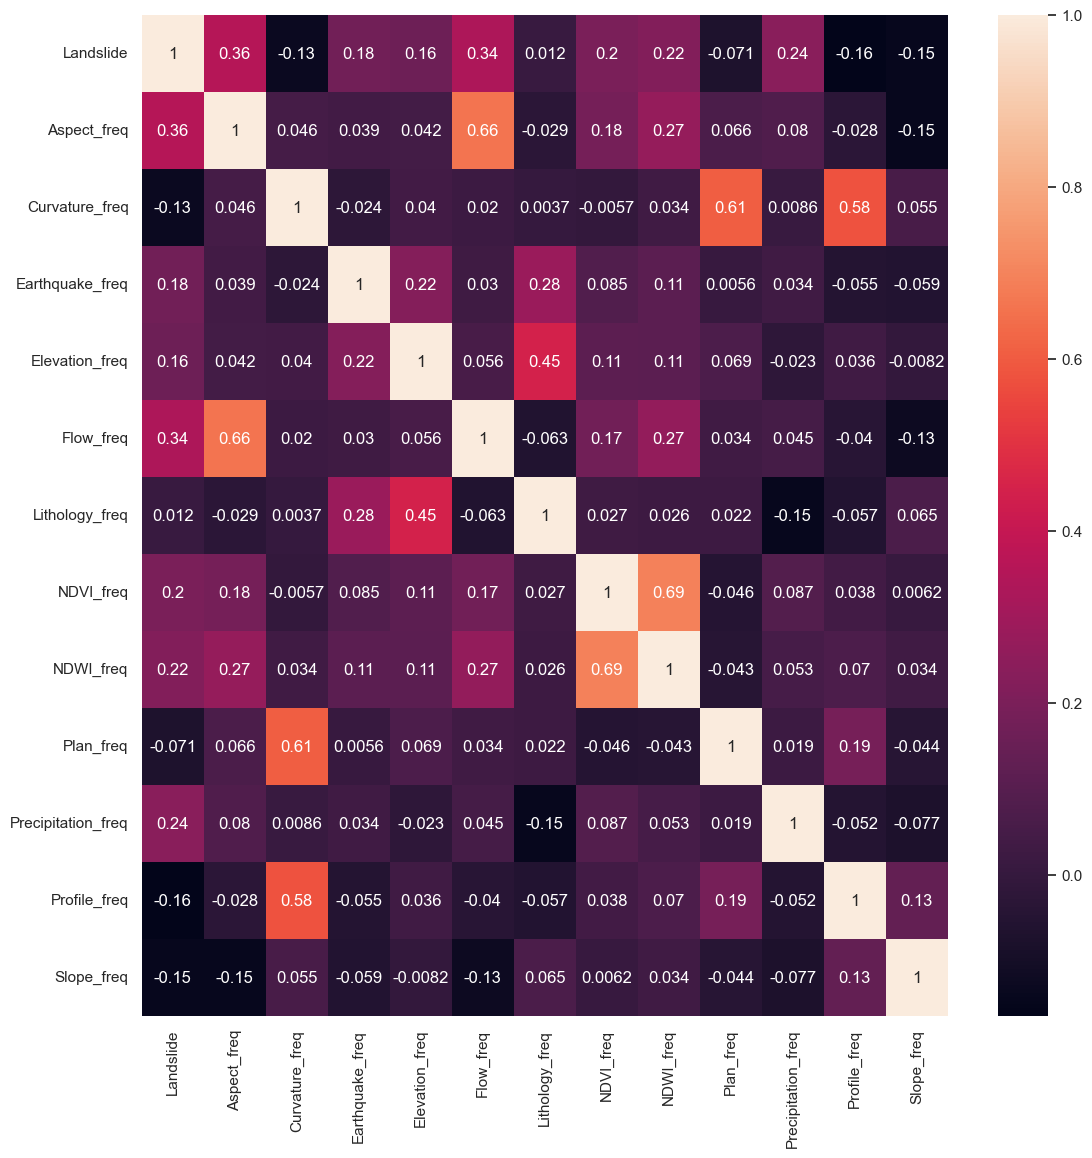

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_freq.corr(), annot=True)

plt.show()

plt.savefig('corr2.eps', format='eps')

## Feature Selection

In [55]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import ensemble

In [56]:
!pip install pca

   ---------------------------------------- 0.0/51.3 kB ? eta -:--:--
   ---------------------------------------- 51.3/51.3 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 2.6 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.8 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.8 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.8 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.8 MB 2.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.6 MB/s eta 0:00:04
   ---- ---------------

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
from pca import pca

X_pca = df.loc[:, df.columns != 'Landslide']

# scaler = StandardScaler()
# scaler.fit(X_pca)
# X_pca = scaler.transform(X_pca)

model = pca()
out = model.fit_transform(X_pca)

print(out['topfeat'])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [24] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [24] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
     PC             feature   loading  type
0   PC1                NDWI  0.615320  best
1   PC2           Curvature  0.484677  best
2   PC3           Lithology  0.533796  best
3   PC4       Precipitation -0.810923  best
4   PC5              Aspect -0.654831  best
5 

[scatterd] >WARNING> The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


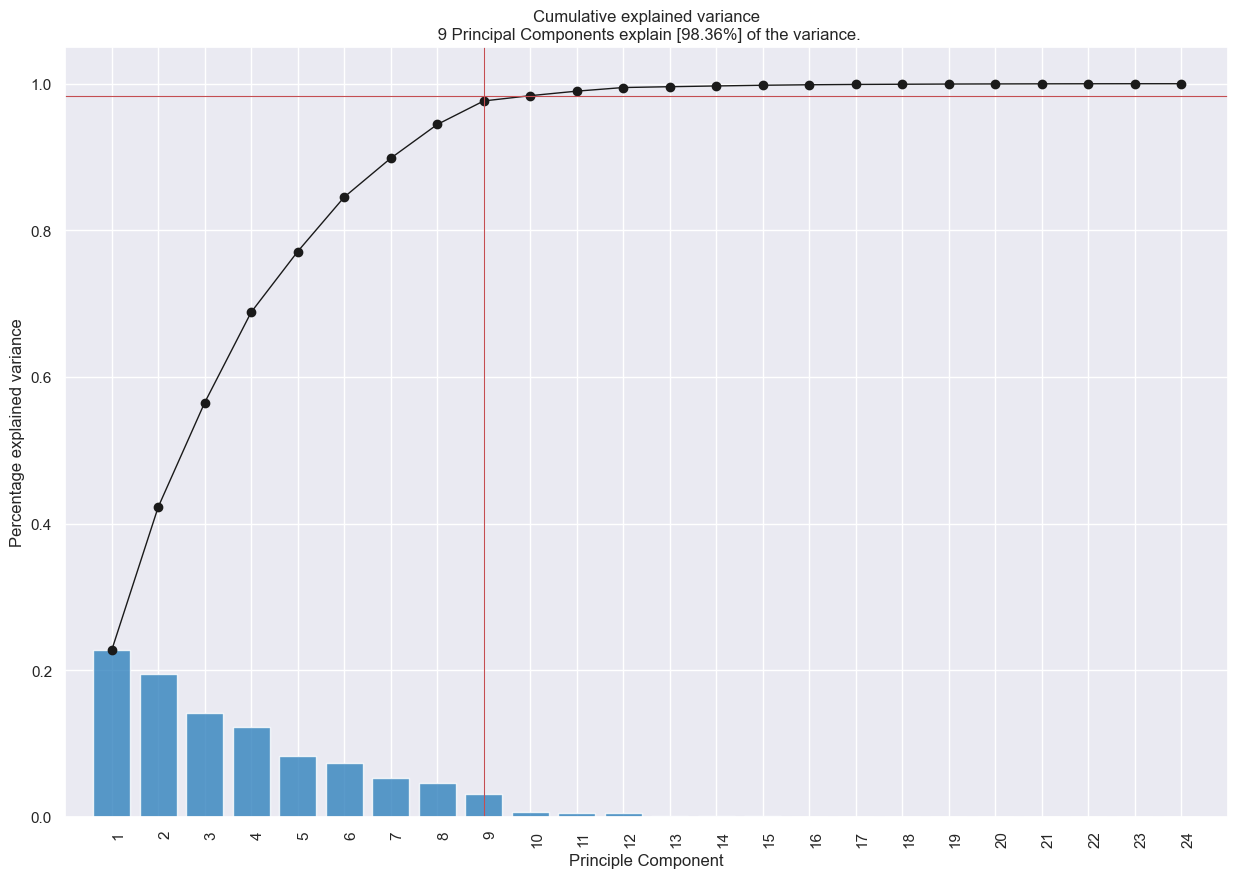

In [59]:
model.plot()

plt.savefig('pca1.eps', format='eps')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


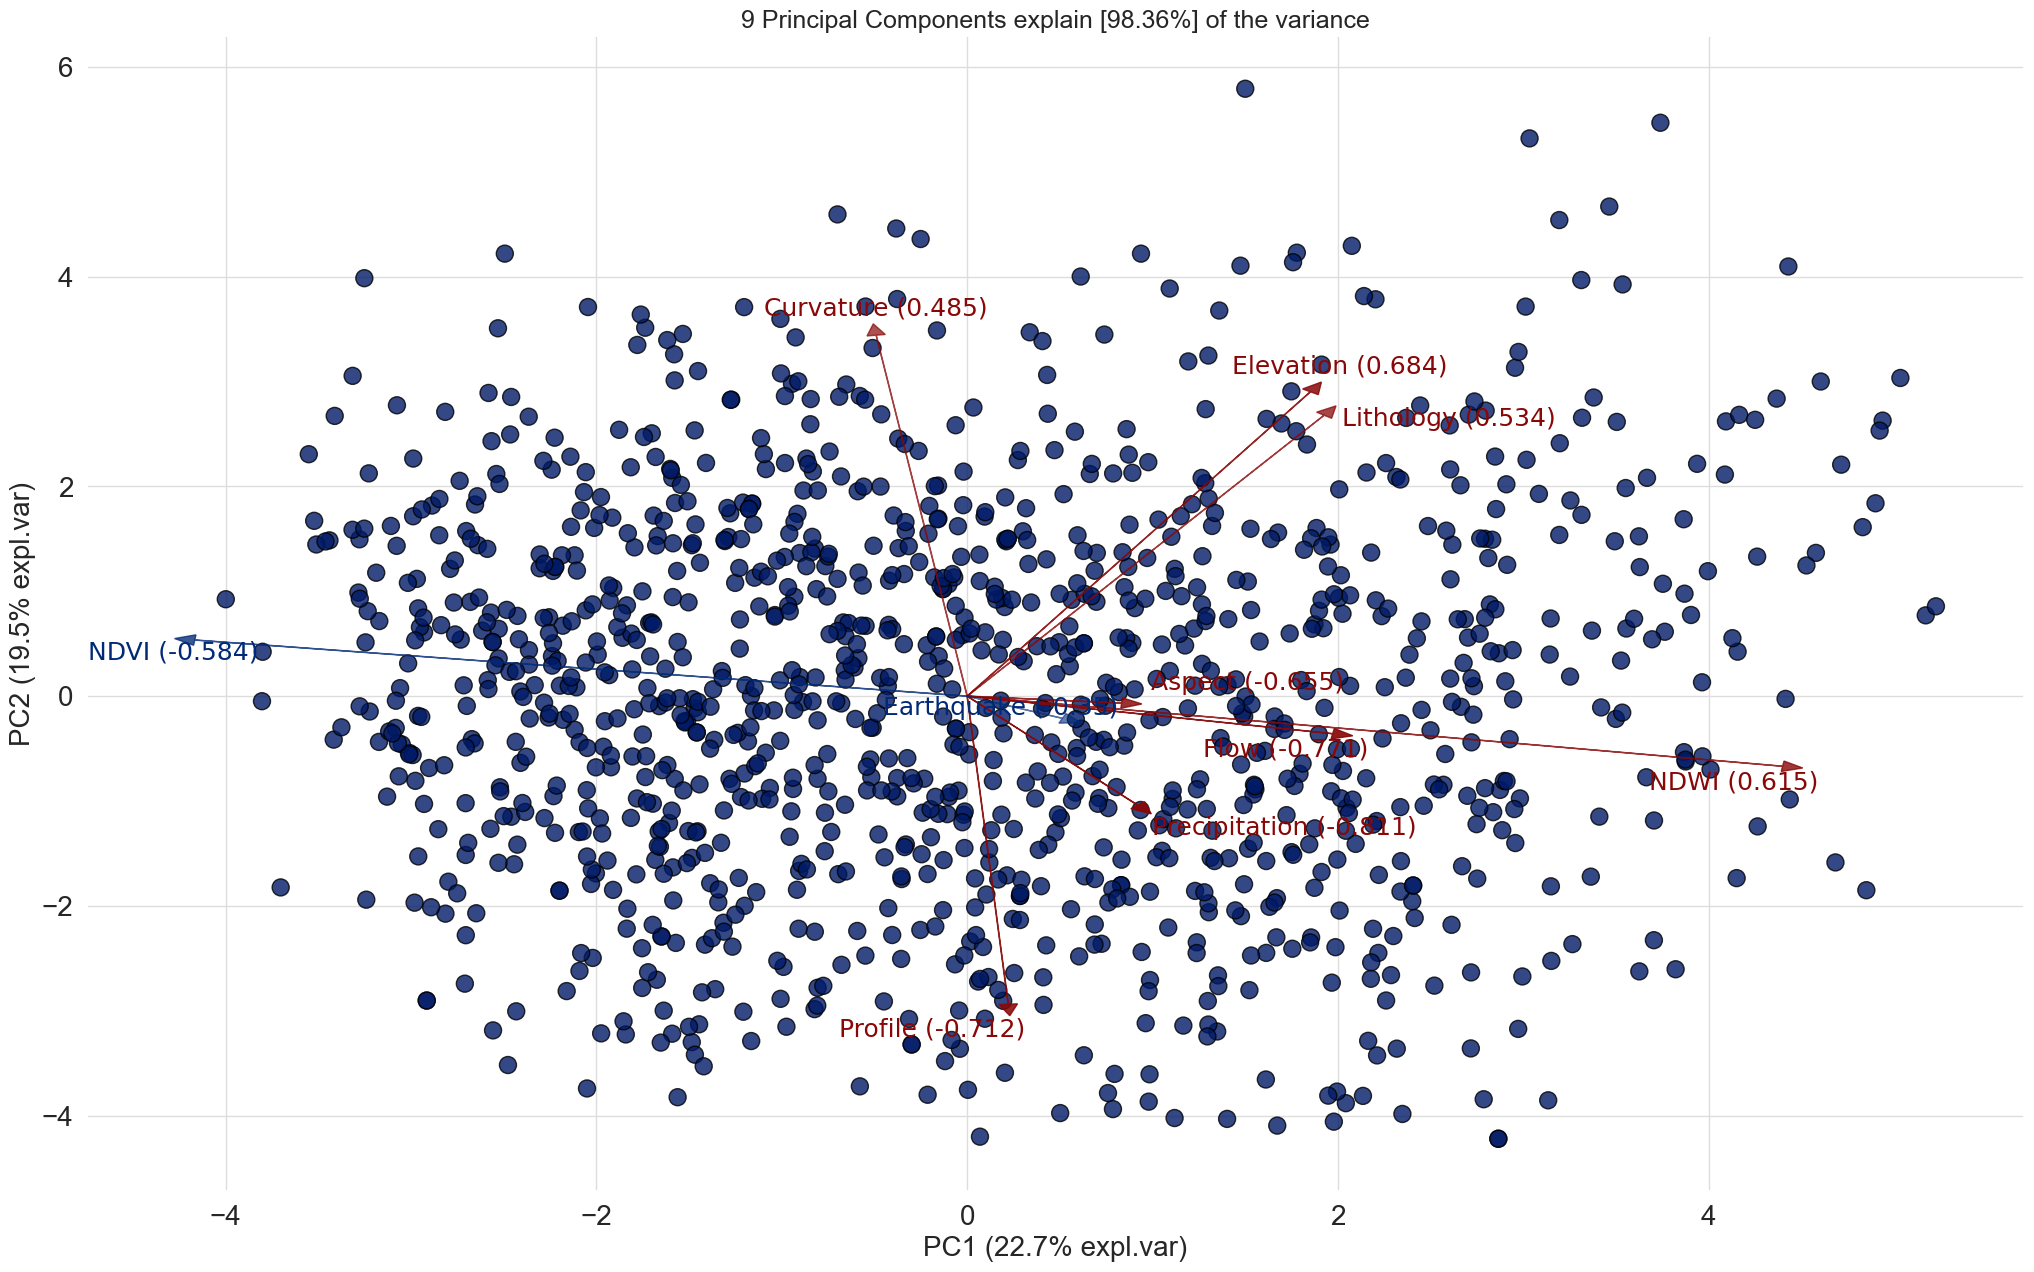

In [60]:
ax = model.biplot(n_feat=10, legend=False)

plt.savefig('pca2.eps', format='eps')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


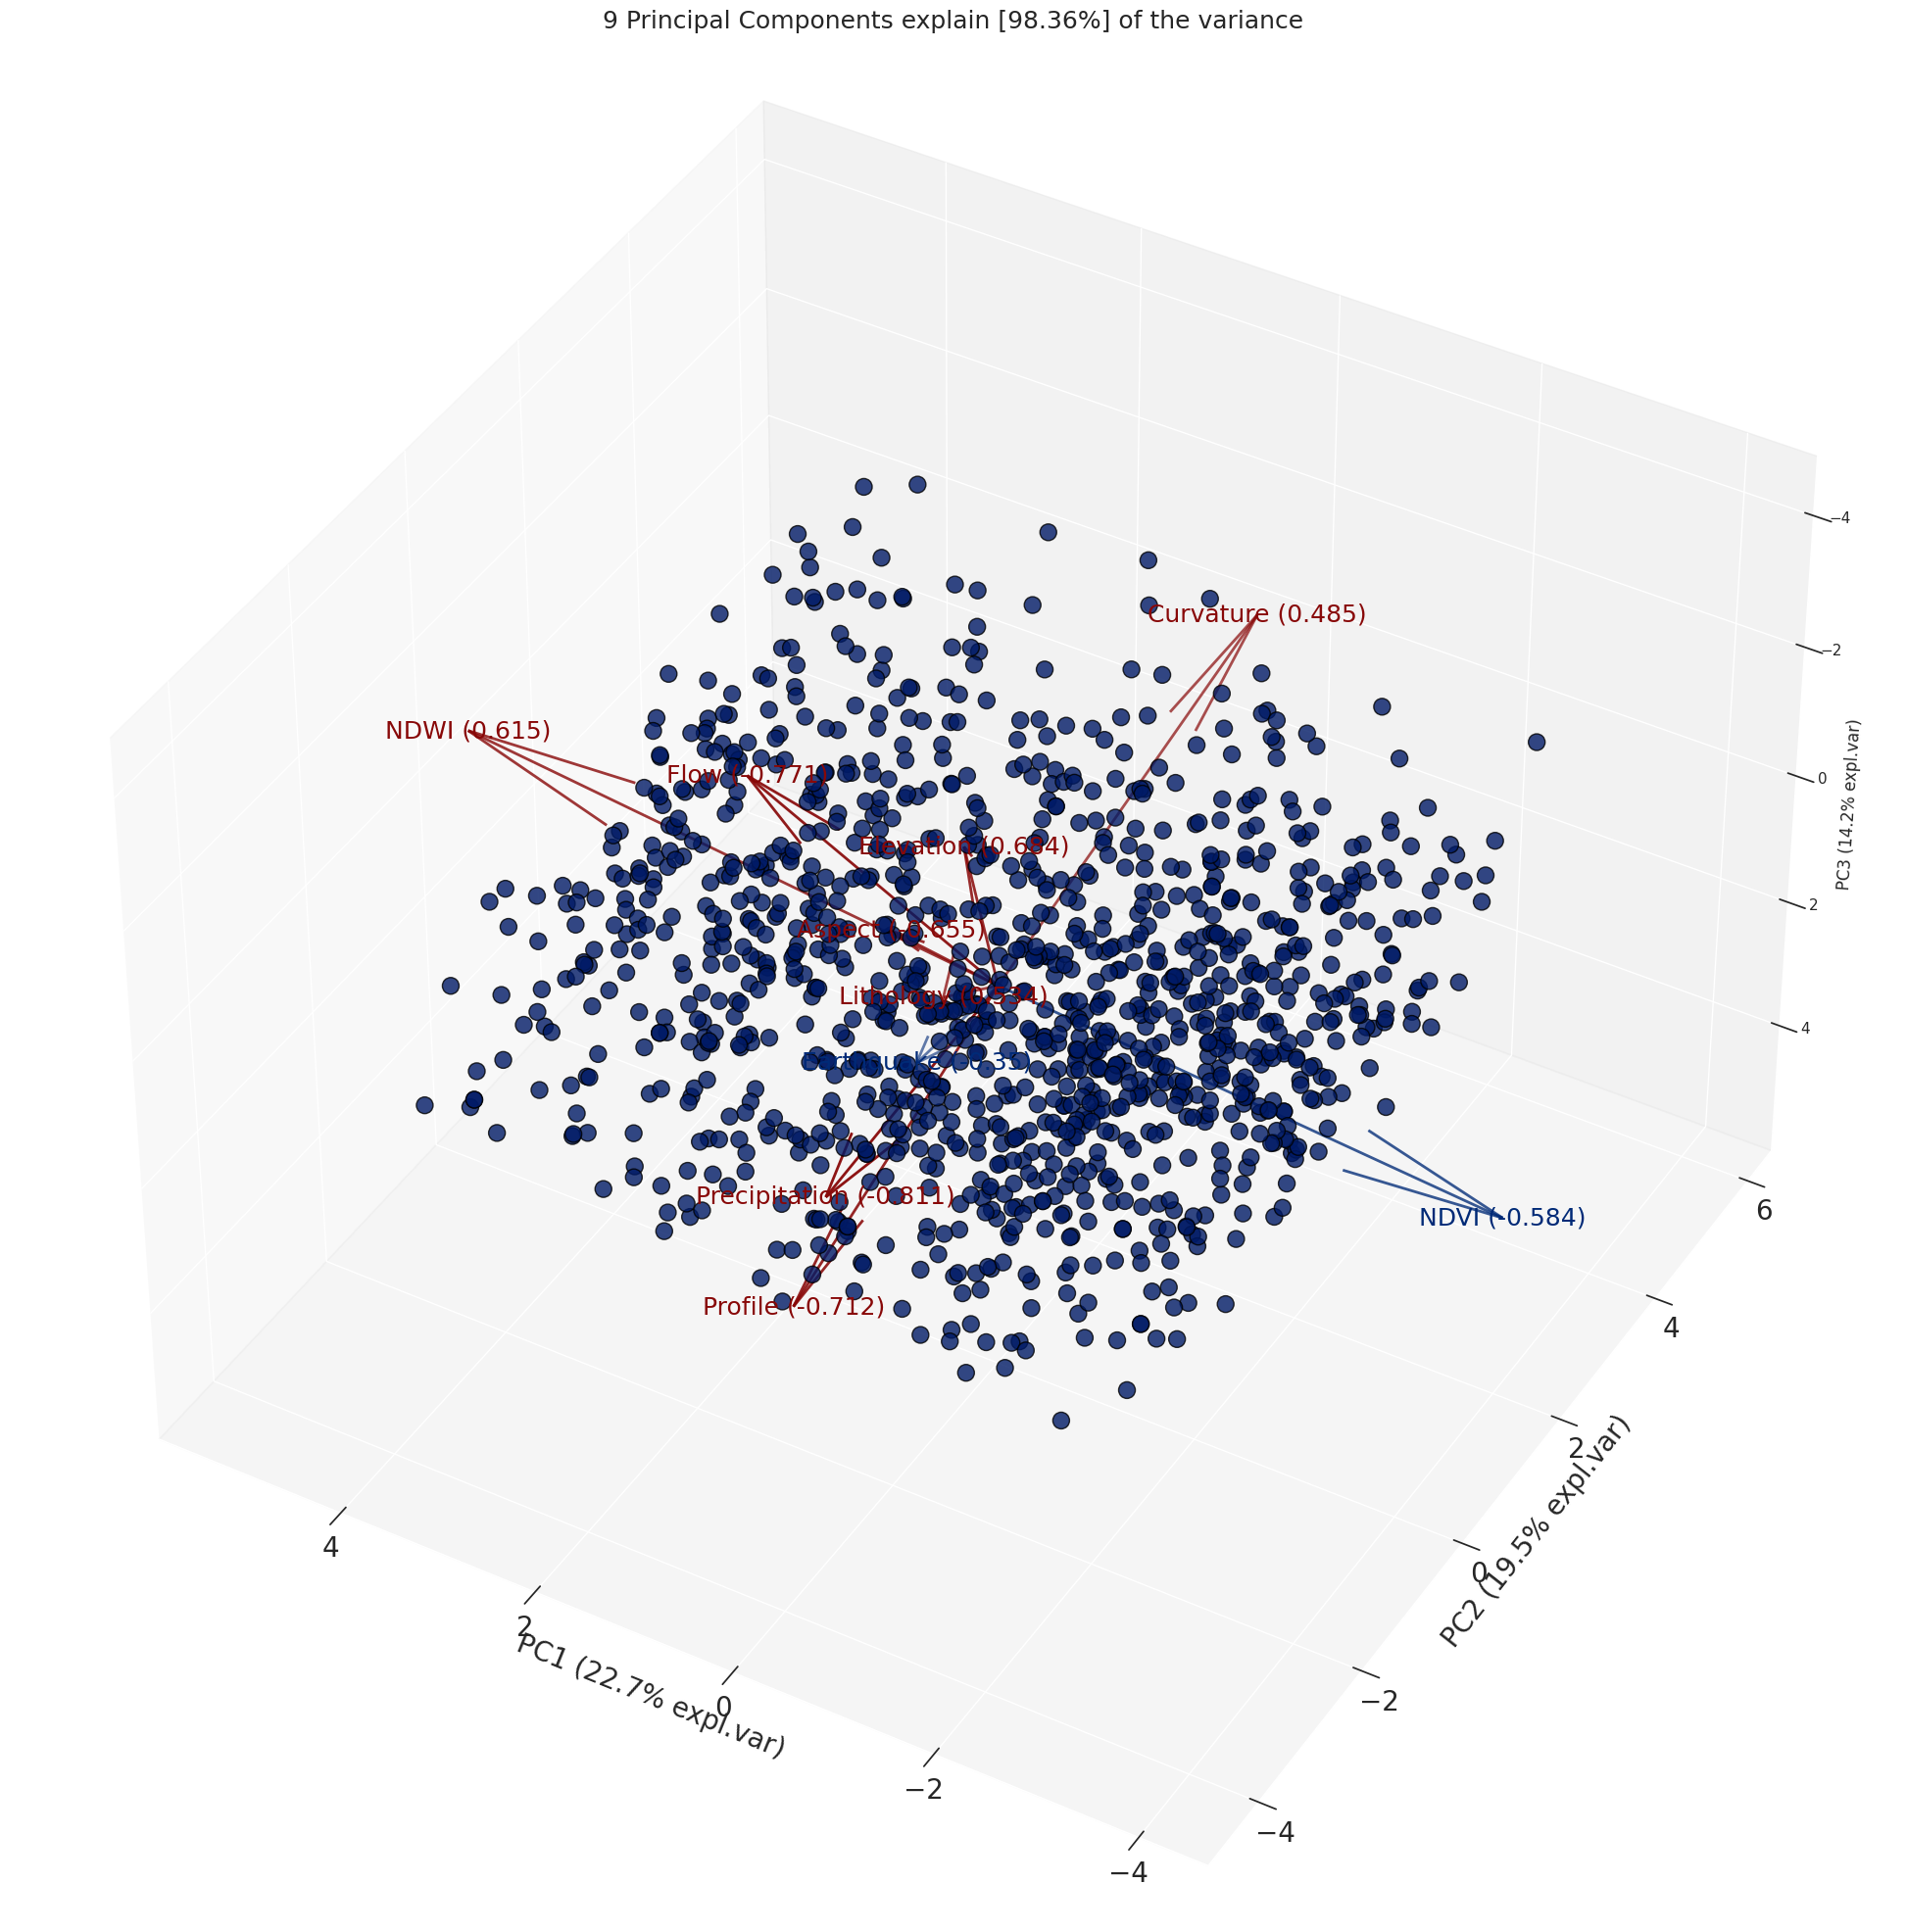

In [61]:
ax = model.biplot3d(n_feat=10, legend=False)

plt.savefig('pca3.eps', format='eps')

# Baseline Model

In [62]:
y = df.Landslide
df1 = df.loc[:, df.columns != 'Landslide']
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)

In [63]:
baseline_gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                          min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline_gbm.fit(X_train,y_train)
predictors_gbm=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline_gbm.score(X_test, y_test)))
pred_gbm=baseline_gbm.predict(X_test)
print(classification_report(y_test, pred_gbm))

Accuracy of the GBM on test set: 0.790
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       125
           1       0.76      0.83      0.79       118

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



In [64]:
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, 
                          #min_samples_split=2, 
                          min_samples_leaf=1, subsample=1,
                          #max_features='sqrt', 
                          random_state=10)
baseline_lgbm.fit(X_train,y_train)
predictors_lgbm=list(X_train)
print('Accuracy of the LGBM on test set: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
pred_lgbm=baseline_lgbm.predict(X_test)
print(classification_report(y_test, pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 488, number of negative: 481
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503612 -> initscore=0.014448
[LightGBM] [Info] Start training from score 0.014448
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accurac

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [66]:
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=10)



In [67]:
# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
pred_rf = random_forest.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = random_forest.score(X_test, y_test)
print('Accuracy of the Random Forest on test set: {:.3f}'.format(accuracy_rf))

# Generate and print the classification report
print(classification_report(y_test, pred_rf))


Accuracy of the Random Forest on test set: 0.765
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       125
           1       0.71      0.88      0.78       118

    accuracy                           0.77       243
   macro avg       0.78      0.77      0.76       243
weighted avg       0.78      0.77      0.76       243



In [69]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.2/99.8 MB 1.7 MB/s eta 0:00:59
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.4/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.5/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.6/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.7/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.8/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.9/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 1.1/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 1.2/99.8 MB 2.3 MB/s eta 0:00:43
    ---------

In [70]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    objective='binary:logistic',  # For binary classification
    random_state=10
)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_xgb = xgb_classifier.score(X_test, y_test)
print('Accuracy of XGBoost on test set: {:.3f}'.format(accuracy_xgb))

# Generate and print the classification report
print(classification_report(y_test, pred_xgb))


Accuracy of XGBoost on test set: 0.819
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       125
           1       0.78      0.86      0.82       118

    accuracy                           0.82       243
   macro avg       0.82      0.82      0.82       243
weighted avg       0.82      0.82      0.82       243



In [74]:
import pickle
# save the model to disk
filename = 'baseline_gbm.sav'
pickle.dump(baseline_gbm, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [75]:
import pickle
# save the model to disk
filename = 'baseline_lgbm.sav'
pickle.dump(baseline_lgbm, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [76]:
import pickle
# save the model to disk
filename = 'random_forest.sav'
pickle.dump(random_forest, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [77]:
import pickle
# save the model to disk
filename = 'xgb_classifier.sav'
pickle.dump(xgb_classifier, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [111]:
res_xgb=xgb_classifier.predict(X_train[4:5])
# type(res_xgb[0])
res_xgb[0]

1

In [86]:
X_train[0:1]


,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,...,Earthquake_freq,Elevation_freq,Flow_freq,Lithology_freq,NDVI_freq,NDWI_freq,Plan_freq,Precipitation_freq,Profile_freq,Slope_freq
583,2,3,2,1,1,4,1,4,3,3,...,0.541254,0.299505,0.219472,0.089109,0.14604,0.181518,0.367162,0.144389,0.351485,0.24505


In [88]:
type(X_train[0:1])

pandas.core.frame.DataFrame